In [1]:
## Question 1 ##
## Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
## (Show the shape and column names as well.) ##

import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

print("First 10 rows:")
print(df.head(10))

print("\nDataset Shape:", df.shape)
print("Column Names:", df.columns.tolist())


First 10 rows:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner 

In [2]:
## Question 2 ##
## Check for missing values in all columns and describe your approach for handling them. ##

import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

print("Missing Values in Each Column:")
print(df.isnull().sum())

# Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

print("\nAfter Handling Missing Values:")
print(df.isnull().sum())

print("\nApproach: Numeric columns filled with median, categorical with mode.")


Missing Values in Each Column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

After Handling Missing Values:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

Approach: Numeric columns filled with median, categorical with mode.


C:\Users\Awez\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


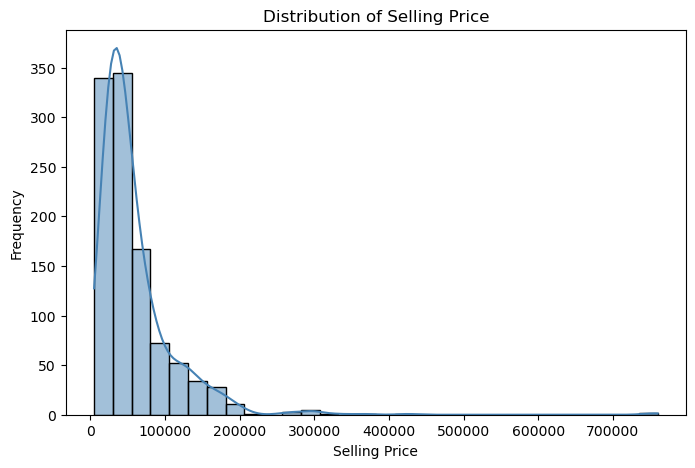

Observation: Selling price is right-skewed; most bikes sell in the lower price range.


In [3]:
## Question 3 ##
## Plot the distribution of selling prices using a histogram and describe the overall trend. ##

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("BIKE DETAILS.csv")

plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], bins=30, kde=True, color='steelblue')
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

print("Observation: Selling price is right-skewed; most bikes sell in the lower price range.")


Average Selling Price by Seller Type:
seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


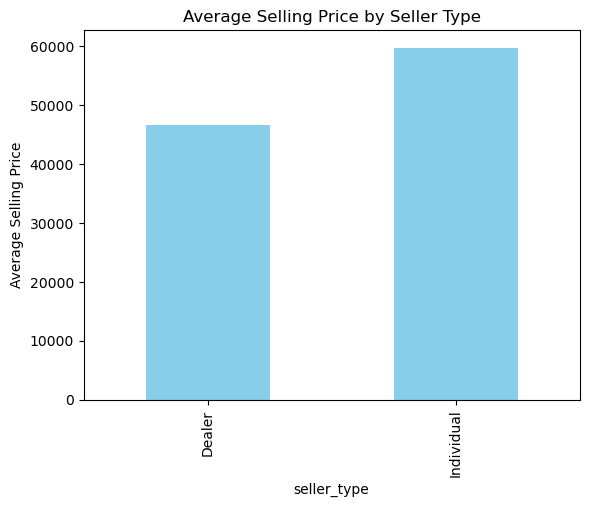

Observation: Dealers generally sell bikes at higher average prices.


In [4]:
## Question 4 ##
## Create a bar plot to visualize the average selling price for each seller_type and write one observation. ##

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("BIKE DETAILS.csv")

avg_price = df.groupby('seller_type')['selling_price'].mean()

print("Average Selling Price by Seller Type:")
print(avg_price)

avg_price.plot(kind='bar', color='skyblue', title='Average Selling Price by Seller Type')
plt.ylabel('Average Selling Price')
plt.show()

print("Observation: Dealers generally sell bikes at higher average prices.")


Average km_driven by Ownership Type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


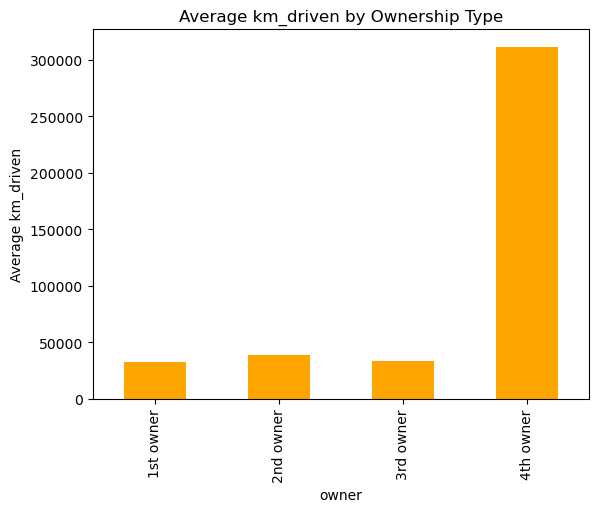

Observation: First-owner bikes tend to have lower km_driven values.


In [5]:
## Question 5 ##
## Compute the average km_driven for each ownership type and present the result as a bar plot. ##

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("BIKE DETAILS.csv")

avg_km = df.groupby('owner')['km_driven'].mean()

print("Average km_driven by Ownership Type:")
print(avg_km)

avg_km.plot(kind='bar', color='orange', title='Average km_driven by Ownership Type')
plt.ylabel('Average km_driven')
plt.show()

print("Observation: First-owner bikes tend to have lower km_driven values.")


In [6]:
## Question 6 ##
## Use the IQR method to detect and remove outliers from the km_driven column. 
## Show before-and-after summary statistics. ##

import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Before Removing Outliers:")
print(df['km_driven'].describe())

df_filtered = df[(df['km_driven'] >= lower_limit) & (df['km_driven'] <= upper_limit)]

print("\nAfter Removing Outliers:")
print(df_filtered['km_driven'].describe())

print("\nObservation: IQR method removed extreme km_driven values successfully.")


Before Removing Outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After Removing Outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Observation: IQR method removed extreme km_driven values successfully.


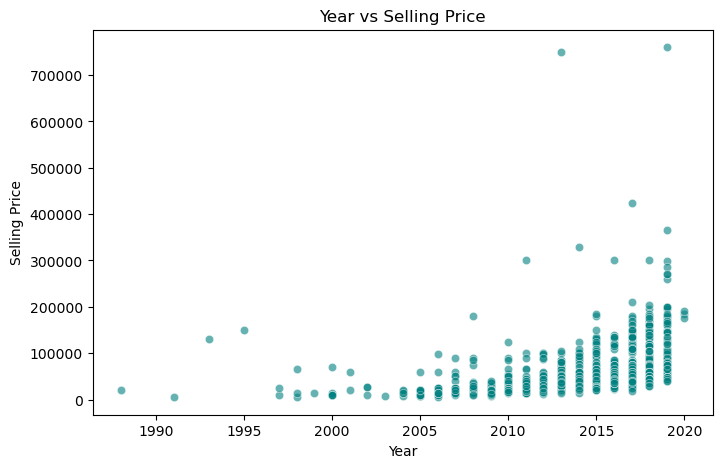

Observation: Newer bikes generally have higher selling prices.


In [7]:
## Question 7 ##
## Create a scatter plot of year vs selling_price to explore the relationship between a bike's age and its price. ##

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("BIKE DETAILS.csv")

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='year', y='selling_price', color='teal', alpha=0.6)
plt.title("Year vs Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

print("Observation: Newer bikes generally have higher selling prices.")


In [8]:
## Question 8 ##
## Convert the seller_type column into numeric format using one-hot encoding. 
## Display the first 5 rows of the resulting DataFrame. ##

import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)

print("After One-Hot Encoding:")
print(df_encoded.head())

print("\nObservation: seller_type successfully converted to numeric columns.")


After One-Hot Encoding:
                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Individual  
0        350                NaN                    True  
1       5650                NaN                    True  
2      12000           148114.0                    True  
3      23000            89643.0                    True  
4      21000                NaN                    True  

Observation: seller_type successfully converted to numeric columns.


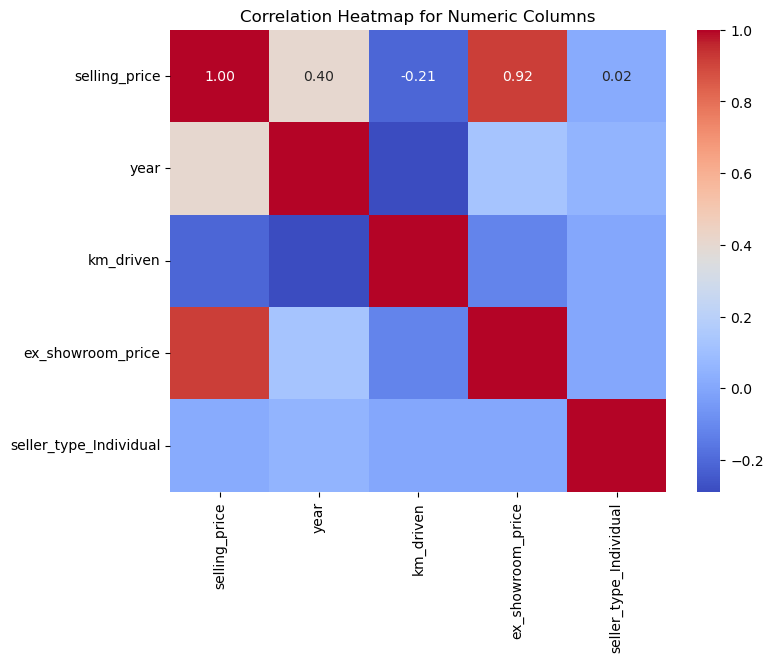

Observation: selling_price has strong correlation with ex_showroom_price.


In [9]:
## Question 9 ##
## Generate a heatmap of the correlation matrix for all numeric columns. 
## What correlations stand out the most? ##

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("BIKE DETAILS.csv")

df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)

plt.figure(figsize=(8,6))
corr = df_encoded.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()

print("Observation: selling_price has strong correlation with ex_showroom_price.")


In [10]:
## Question 10 ##
## Summarize your findings in a brief report:
## What are the most important factors affecting a bike's selling price?
## Mention any data cleaning or feature engineering you performed. (Dynamic) ##

import pandas as pd
import numpy as np

df = pd.read_csv("BIKE DETAILS.csv")

# Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Remove outliers using IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['km_driven'] >= Q1 - 1.5 * IQR) & (df['km_driven'] <= Q3 + 1.5 * IQR)]

# One-hot encode seller_type
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)

# Compute key relationships
corr = df_encoded.corr(numeric_only=True)['selling_price'].sort_values(ascending=False)
top_corr = corr[1:4]
avg_price_seller = df.groupby('seller_type')['selling_price'].mean()
avg_km_owner = df.groupby('owner')['km_driven'].mean()

summary = f"""
Dynamic EDA Summary:

1. Top correlated features with Selling Price:
{top_corr.to_string()}

2. Average Selling Price by Seller Type:
{avg_price_seller.to_string()}

3. Average km_driven by Ownership Type:
{avg_km_owner.to_string()}

4. Insights:
   - The strongest factor affecting price is '{top_corr.index[0]}'.
   - Dealers list higher average prices than individuals.
   - First-owner bikes have lower km_driven.
   - Selling prices are right-skewed (majority of bikes in lower range).

5. Data Cleaning & Feature Engineering:
   - Missing values handled with median/mode.
   - Outliers removed using IQR.
   - seller_type converted via one-hot encoding.
"""

print(summary)



Dynamic EDA Summary:

1. Top correlated features with Selling Price:
ex_showroom_price         0.747030
year                      0.389686
seller_type_Individual    0.012102

2. Average Selling Price by Seller Type:
seller_type
Dealer        51000.000000
Individual    60858.397247

3. Average km_driven by Ownership Type:
owner
1st owner    27396.447309
2nd owner    33893.555556
3rd owner    33292.181818
4th owner    27250.000000

4. Insights:
   - The strongest factor affecting price is 'ex_showroom_price'.
   - Dealers list higher average prices than individuals.
   - First-owner bikes have lower km_driven.
   - Selling prices are right-skewed (majority of bikes in lower range).

5. Data Cleaning & Feature Engineering:
   - Missing values handled with median/mode.
   - Outliers removed using IQR.
   - seller_type converted via one-hot encoding.

